In [84]:
import pandas as  pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pylab import mpl
from matplotlib.backends.backend_pdf import PdfPages

mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率

t = list(os.walk('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_fillna'))[0][2]
t.sort()

with PdfPages('异常检测_simple.pdf') as pdf: 
    for fname in t[1:]:    
        df = pd.read_csv('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_fillna/'+fname)
        df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
        df['是否正常'] = 1 # 1 代表正常
        #对各项特征进行筛选,只要有一项特征不正常,视为异常
        df.loc[(df['体温']<35.8) | (df['体温']>37.4),'是否正常'] = 0#  60 岁以上 正常体温 35.8~37.4 (资料来源网络)
        df.loc[(df['呼吸率']<12) | (df['呼吸率']>20),'是否正常'] = 0#老人正常呼吸率 12~20 (资料来源网络)
        df.loc[(df['脉率']<60) | (df['脉率']>100),'是否正常'] = 0#  60 岁以上正常脉率 67~80 (资料来源网络)
        df.loc[(df['血压(低)']<60) | (df['血压(低)']>90),'是否正常'] = 0#  60 岁以上正常舒张压60~90 (资料来源网络)
        df.loc[(df['血压(高)']<90) | (df['血压(高)']>140),'是否正常'] = 0#  60 岁以上正常收缩压 90~140 (资料来源网络)
        df.loc[(df['血氧饱和度']<94),'是否正常'] = 0#  60 岁以上正常血氧饱和度>94% (资料来源网络)
        #绘制时间序列散点图
        plt.figure(figsize=(20,10))
        plt.title(fname+' 体征异常检测 (0-异常/1-正常)',fontsize='large',fontweight='bold')
        plt.plot_date(x = df.date, y = df['是否正常'], fmt='.b',alpha = 0.5)
        pdf.savefig()
        plt.close()
        df.to_csv('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_fillna_anomalyDetection/'+fname,index=False)

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26261.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26313.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26314.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26315.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26920.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26921.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '28089.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '30581.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '30592.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '30629.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '31010.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '31011.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '32441.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '32542.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '33365.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44116.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44624.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44626.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44629.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44631.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44634.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44635.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44636.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44637.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44639.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44640.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44641.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44643.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44645.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44646.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44647.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44648.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44649.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44651.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44653.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44656.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44660.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '44661.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '45572.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '45600.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46260.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46261.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46351.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46573.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46577.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46603.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46661.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46678.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46686.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46693.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46700.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46702.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46703.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46704.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46705.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46707.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46708.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46709.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46711.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46712.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46713.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46734.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46811.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46814.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46823.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46824.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46825.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46826.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46827.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46828.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46849.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46852.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46853.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46873.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46898.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46943.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46971.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '46973.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47016.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47017.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47026.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47089.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47119.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47139.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47149.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47158.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47163.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47169.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47199.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47205.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47207.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47216.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47222.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47226.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47238.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47247.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47256.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47257.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47297.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47326.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47328.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47341.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47343.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47355.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47359.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47360.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47361.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47366.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47367.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47379.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47380.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47383.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47436.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47437.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47481.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47506.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47595.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47599.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47603.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47604.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47788.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47796.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47813.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47880.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47884.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47892.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '47927.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48063.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48066.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48076.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48105.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48156.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48164.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48227.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48240.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48259.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48276.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48279.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48290.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48322.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48325.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48387.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48447.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48454.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48455.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48482.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48487.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48493.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48496.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48499.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48520.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48528.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48544.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48545.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48602.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48614.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48622.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48625.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48635.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48644.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48647.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48654.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48664.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48680.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48683.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48684.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48689.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48690.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48694.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48698.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48712.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48747.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48757.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48771.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48789.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48791.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48801.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48807.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48808.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48814.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48815.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48824.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48827.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48839.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48843.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48845.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48853.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48868.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48871.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48875.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48878.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48885.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48888.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48889.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48894.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48899.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48900.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48902.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48906.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48907.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48908.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '48913.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '49583.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '49595.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '49614.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '49618.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '52552.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '52622.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '52630.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55535.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55571.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55574.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55595.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55616.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55659.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55662.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55663.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55675.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55691.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55697.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55708.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55713.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55717.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55721.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55735.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55738.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55768.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55776.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55777.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55783.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55808.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55811.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55818.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55823.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55834.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55847.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55848.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55860.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55867.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55890.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55898.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '55914.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56021.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56040.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56060.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56103.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56296.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56297.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56342.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56351.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56377.csv 体征异常检测 (0-异常/1-正常)')

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '56391.csv 体征异常检测 (0-异常/1-正常)')

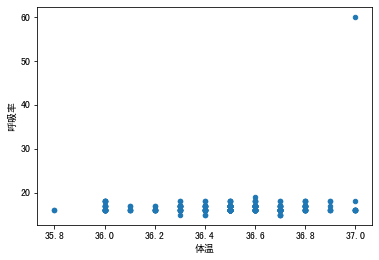

In [46]:
df.plot(x='体温',y='呼吸率',kind = 'scatter')

In [44]:
df.loc[(df['体温']>35.8) & (df['体温']<37.4),'是否正常'] = 0

In [58]:
f = '是否正常'
df.speed

AttributeError: 'DataFrame' object has no attribute 'speed'

In [40]:
d

NameError: name 'd' is not defined

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '31010.csv 体征异常检测')

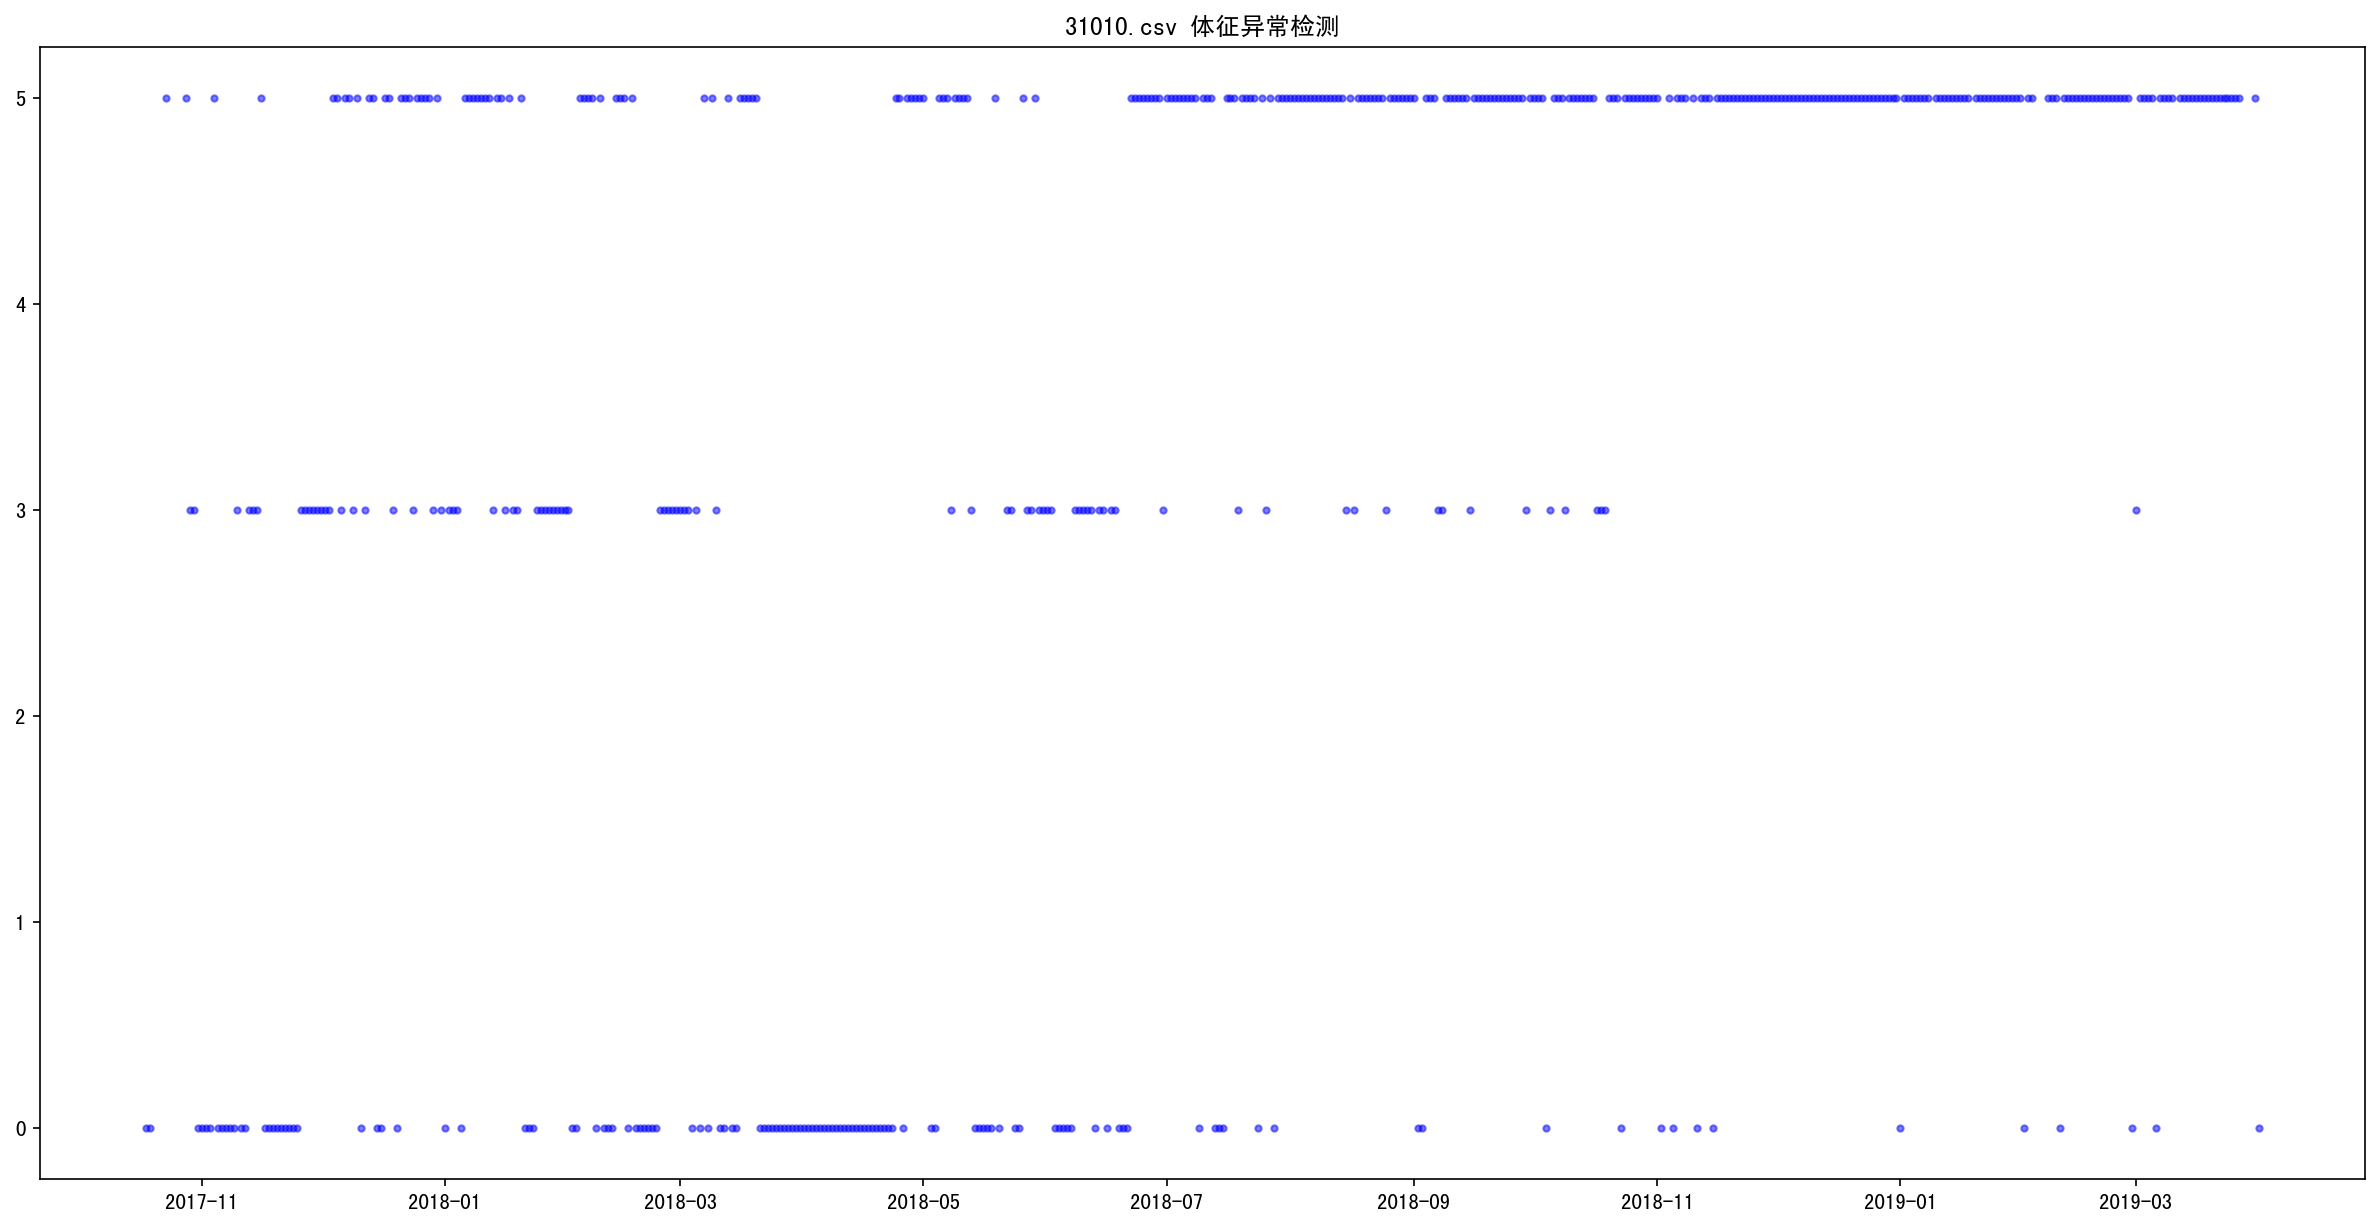

In [81]:
fname = '31010.csv'
df = pd.read_csv('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_fillna/'+fname)
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['是否正常'] = 0 # 0 代表正常
#对各项特征进行筛选
df.loc[(df['体温']<35.8) | (df['体温']>37.4),'是否正常'] = 1#  60 岁以上 正常体温 35.8~37.4 (资料来源网络)
df.loc[(df['呼吸率']<12) | (df['呼吸率']>20),'是否正常'] = 2#老人正常呼吸率 12~20 (资料来源网络)
df.loc[(df['脉率']<67) | (df['脉率']>80),'是否正常'] = 3#  60 岁以上正常脉率 67~80 (资料来源网络)
df.loc[(df['血压(低)']<60) | (df['血压(低)']>90),'是否正常'] = 4#  60 岁以上正常舒张压60~90 (资料来源网络)
df.loc[(df['血压(高)']<90) | (df['血压(高)']>140),'是否正常'] = 5#  60 岁以上正常收缩压 90~140 (资料来源网络)
df.loc[(df['血氧饱和度']<94),'是否正常'] = 6#  60 岁以上正常血氧饱和度>94% (资料来源网络)
#绘制时间序列散点图
plt.figure(figsize=(20,10))
plt.title(fname+' 体征异常检测',fontsize='large',fontweight='bold')
# plt.text(4, 1, 'hasattr呼呼', ha='left', wrap=True)
plt.plot_date(x = df.date, y = df['是否正常'], fmt='.b',alpha = 0.5)
plt.show()